In [1]:
#LẤY DỮ LIỆU THÔ
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

In [2]:
#THỰC HIỆN LẤY DỮ LIỆU THÔ TRỰC TIẾP TỪ AGODA.COM

browser = webdriver.Chrome(executable_path="chromedriver.exe")
browser.get("https://www.agoda.com/vi-vn/zalosea-hotel/hotel/da-nang-vn.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1734438&numberOfBedrooms=&familyMode=false&adults=1&children=0&rooms=1&maxRooms=0&checkIn=2021-04-19&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=-1&showReviewSubmissionEntry=false&currencyCode=VND&isFreeOccSearch=false&tspTypes=6,16&los=1&searchrequestid=01d52452-cf62-4e54-afb9-6cc8b931d76a")
sleep(5)

reviews = []
#Tìm tên, bình luận khách hàng, và điểm đánh giá rồi lưu vào list "reviews"
review_list = browser.find_elements_by_xpath("//div[@Class='Review-comment']")
for review in review_list:
    elements = []
    user = review.find_element_by_class_name("Review-comment-reviewer")
    score = review.find_element_by_class_name("Review-comment-leftScore")
    elements.append("< >")
    elements.append(user.text)
    elements.append("< >")
    elements.append(score.text)
    elements.append("< >")
    elements.append("*")
    content = review.find_elements_by_class_name("Review-comment-bodyText")
    num_review = len(content)
    for i in range(num_review):
        review=content[i].text
        elements.append(review)
        elements.append("< >")
    elements.append("*")
    reviews.append(elements)       
browser.close()
#Ghi dữ liệu từ list ra 1 file text, mỗi phần tử của list ghi 1 dòng
#‘w’: ghi đè, nếu file đã tồn tại thì sẽ bị ghi đè
#‘a’: ghi nối, nếu file đã tồn tại thì ghi tiếp vào cuối file
def WriteListToTextFile (list, filePath, mode='a'):
    with open(filePath, mode, encoding="utf8") as myfile:
        for item in list:
            # Function to convert  
            def listToString(s): 
                str1 = " " 
                return (str1.join(s)) 
            myfile.write(listToString(item) +  '\n')
WriteListToTextFile(reviews, 'C:/Users/DELL/(pyK) Project sentiment analysis/data.txt', mode='a')

In [7]:
#LÀM SẠCH DỮ LIỆU
import pyvi
import numpy as np
import pandas as pd
import xlrd #Thư viện xlrd làm việc với dữ liệu excel
from pyvi import ViTokenizer #Thư viện ViTokenizer để nối từ ghép Tiếng Việt
import re #Regular expression(biểu thức chính quy), dùng để so khớp các chuỗi hoặc một tập các chuỗi

In [8]:
#ĐỌC DỮ LIỆU TỪ FILE EXCEL

loc = ("C:/Users/DELL/(pyK) Project sentiment analysis/raw_data.xlsx")
raw_data = xlrd.open_workbook(loc)
train_sheet = raw_data.sheet_by_index(0)
test_sheet = raw_data.sheet_by_index(1)

train_list1 = []
for i in range(train_sheet.nrows):
    train_list1.append(train_sheet.cell_value(i, 0))
test_list1 = []
for i in range(test_sheet.nrows):
    test_list1.append(test_sheet.cell_value(i, 0))

#Bóc tách bình luận và điểm đánh giá của tập train
train_list2 = []
for x in train_list1:
    for y in x.split("< > *"):
        train_list2.append(y)
#loại bỏ ký tự null trong list
train_list2 = list(filter(None, train_list2))
train_list3 = []
train_part_list = []
for i in range(len(train_list2)):
    if i%2 == 0:
        train_list3.append(train_list2[i])
    if i%2 != 0:
        train_part_list.append(train_list2[i])
train_list4 = []
for x in train_list3:
    for y in x.split(" < > "):
        train_list4.append(y)
train_part_list_scores = []
for i in range(len(train_list4)):
    if i%2 != 0:
        train_part_list_scores.append(train_list4[i])
    if i%2 == 0:
        pass

#Bóc tách bình luận và điểm đánh giá của tập test
test_list2 = []
for x in test_list1:
    for y in x.split("< > *"):
        test_list2.append(y)
#loại bỏ ký tự null trong list
test_list2 = list(filter(None, test_list2))
test_list3 = []
test_part_list = []
for i in range(len(test_list2)):
    if i%2 == 0:
        test_list3.append(test_list2[i])
    if i%2 != 0:
        test_part_list.append(test_list2[i])
test_list4 = []
for x in test_list3:
    for y in x.split(" < > "):
        test_list4.append(y)
test_part_list_scores = []
for i in range(len(test_list4)):
    if i%2 != 0:
        test_part_list_scores.append(test_list4[i])
    if i%2 == 0:
        pass

In [9]:
#lÀM SẠCH KÝ TỰ RÁC CHO TẬP DỮ LIỆU

space_replacing1 = re.compile("[^a-zA-Z_0-9ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưăạảấầẩẫậắằẳẵặẹẻẽềềểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹế\\s]")
space_replacing2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(\n)")

def space_cleaning (reviews):
    cleaned_reviews = []
    for review in reviews:
        review = space_replacing1.sub(" ", str(review).lower())
        review = space_replacing2.sub(" ", str(review))
        review = " ".join(review.split())
        cleaned_reviews.append(review)
    return cleaned_reviews

train_clean = space_cleaning(train_part_list)
test_clean = space_cleaning(test_part_list)

In [10]:
#TOKENIZATION - THỰC HIỆN NỐI TỪ GHÉP TIẾNG VIỆT

def review_tokenizing (reviews):
    tokenized_reviews = []
    for review in reviews:
        tokenized_reviews.append(ViTokenizer.tokenize(review))
    return tokenized_reviews

tokenized_train = review_tokenizing(train_clean)
tokenized_test = review_tokenizing(test_clean)

In [11]:
#THỰC HIỆN LOẠI BỎ STOP-WORDS

stop_words = []
stop_words = [line.strip('\n') for line in open('vietnamese-stopwords-dash.txt', 'r', encoding='utf-8')]

def stop_words_removing (reviews):
    final = []
    for review in reviews: 
        removed = []
        for word in review.split(" "):
            if (word not in stop_words):
                removed.append(word)
        final.append(" ".join(removed))
    return final

final_train = stop_words_removing(tokenized_train)
final_test = stop_words_removing(tokenized_test)

In [13]:
#KẾT QUẢ - BỘ DỮ LIỆU ĐÃ ĐƯỢC TIỀN XỬ LÝ

print(final_train)
print(len(final_train))
print(train_part_list_scores)
print(len(train_part_list_scores))
print(final_test)
print(len(final_test))
print(test_part_list_scores)
print(len(test_part_list_scores))

['khách_sạn đẹp phòng sạch_sẽ nhân_viên nhiệt_tình lắm ổn', 'sai mường khen _giá _các nhân_viên cực_kì thân_thiện _mình đêm sn tặng bánh kem _sảnh rộng đẹp ngon sát biển _nội thất kk sạch_sẽ _đi nhân_viên cười giúp ko _khu vui_chơi trẻ sữa chữa hơi tiếc', 'ok', 'địa_điểm thuân tiện trang thiết_bị hiện_đại', 'ks sạch_sẽ nhân_viên nhiệt_tình tiền', 'cải_thiện thái_độ phục_vụ đội_ngũ nhân_viên bãi biển', 'phòng_ốc sạch_sẽ nhân_viên lịch_sự', 'đẹp giá_cả ok', 'ks phuc vụ dv ok ko dv bãi biển nhan viên ko kh ks ko hướng_dẫn m m mường miễn_cưỡng khăn hải_sản ko tùm_lum ko hài_lòng dv ng bãi biển thoi ok tàu xí xô xí xào suốt thiệt nhức sảnh', 'trung_tâm khách_sạn phòng hướng trực_diện biển tầm thoáng đẹp khách_sạn sang_trọng yên_tĩnh đông đoàn du_lịch tour nội_thất phòng bình_thường màu thảm trải sàn cảm_giác sạch_sẽ nội_thất xấu khách_sạn 5 có_nhân_viên đi đường tắm biển novotel ô_tô xe_máy chạy cửa khách_sạn đông lao rầm_rập đường biển sợ rớt tim nhân_viên thân_thiện trừ bộ_phận lễ_tân nhâ

In [53]:
#THỰC HIỆN WORD-EMBEDDING BẰNG MÔ HÌNH WORD2VEC
import gensim #Thư viện hỗ trợ cài đặt mô hình word2vec
from gensim.models import Word2Vec
import matplotlib.pyplot as plt #Thư viện hỗ trợ visualize dữ liệu
#Sklearn-thư viện hỗ trợ cài đặt các thuật toán cơ bản như SVM, ANN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import IncrementalPCA #inital reduction
from sklearn.manifold import TSNE #final reduction

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence #Hỗ trợ padding cho câu

In [33]:
#XÂY DỰNG TỪ ĐIỂN TỪ CHO TẬP DỮ LIỆU - WORD DICTIONARY

word_dict = []
for review in final_train:
    for word in review.split(" "):
        if word not in word_dict:
            word_dict.append(word)
for review in final_test:
    for word in review.split(" "):
        if word not in word_dict:
            word_dict.append(word)
#loại bỏ ký tự null trong list
word_dict = list(filter(None, word_dict))

print(word_dict)
print(len(word_dict))

['khách_sạn', 'đẹp', 'phòng', 'sạch_sẽ', 'nhân_viên', 'nhiệt_tình', 'lắm', 'ổn', 'sai', 'mường', 'khen', '_giá', '_các', 'cực_kì', 'thân_thiện', '_mình', 'đêm', 'sn', 'tặng', 'bánh', 'kem', '_sảnh', 'rộng', 'ngon', 'sát', 'biển', '_nội', 'thất', 'kk', '_đi', 'cười', 'giúp', 'ko', '_khu', 'vui_chơi', 'trẻ', 'sữa', 'chữa', 'hơi', 'tiếc', 'ok', 'địa_điểm', 'thuân', 'tiện', 'trang', 'thiết_bị', 'hiện_đại', 'ks', 'tiền', 'cải_thiện', 'thái_độ', 'phục_vụ', 'đội_ngũ', 'bãi', 'phòng_ốc', 'lịch_sự', 'giá_cả', 'phuc', 'vụ', 'dv', 'nhan', 'viên', 'kh', 'hướng_dẫn', 'm', 'miễn_cưỡng', 'khăn', 'hải_sản', 'tùm_lum', 'hài_lòng', 'ng', 'thoi', 'tàu', 'xí', 'xô', 'xào', 'suốt', 'thiệt', 'nhức', 'sảnh', 'trung_tâm', 'hướng', 'trực_diện', 'tầm', 'thoáng', 'sang_trọng', 'yên_tĩnh', 'đông', 'đoàn', 'du_lịch', 'tour', 'nội_thất', 'bình_thường', 'màu', 'thảm', 'trải', 'sàn', 'cảm_giác', 'xấu', '5', 'có_nhân_viên', 'đi', 'đường', 'tắm', 'novotel', 'ô_tô', 'xe_máy', 'chạy', 'cửa', 'lao', 'rầm_rập', 'sợ', 'rớt'

In [39]:
#BIỂU DIỄN MỖI TỪ TRONG TỪ ĐIỂN THÀNH CÁC ONE-HOT VECTOR

le = LabelEncoder()
le.fit(word_dict) #Gán index cho các từ trong từ điển bằng LabelEncoder (7400 indices tương ứng 7400 từ trong từ điển)
words = le.classes_ #Các từ trong từ điển theo thứ tự từ 0 đến 7399
word_dict_indices = le.transform(word_dict) #Bộ từ điển ở dạng indices
word_dict_text = le.inverse_transform(x) #Bộ từ điển ở dạng text

oh = OneHotEncoder()
words_with_indices = list(zip(le.classes_, np.arange(len(le.classes_)))) #Từ điển từ với index tương ứng (theo thứ tự 0-7399)
oh.fit(word_dict_with_indices)
texts_and_indices_arrays = oh.categories_ #Hai mảng của text và indices (theo thứ tự 0-7399)

#Biến đổi mỗi từ trong từ điển sang dạng one-hot vector
words_indices = list(zip(word_dict, word_dict_indices)) #Từ điển từ với index tương ứng (không theo thứ tự)
one_hot = oh.transform(words_indices).toarray()
print('Từ điển từ ở dạng one-hot: \n', one_hot)
print(len(one_hot))

Từ điển từ ở dạng one-hot: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
7400


In [42]:
#THỰC HIỆN WORD-EMBEDDING BẰNG MÔ HÌNH WORD2VEC

y = []
y = final_train + final_test
#Xây dựng mô hình word2vec bằng thư viện gensim
sentences = [[item.lower() for item in doc.split()] for doc in y]
w2v_model = Word2Vec(sentences, min_count = 1, vector_size = 100, window = 10, sg = 1, workers = 8)
#Min_count: Những từ có số lần xuất hiện không lớn hơn giá trị này sẽ bị bỏ qua
#Vector_size: Số chiều của một vec-tơ biểu diễn từ
#Window: Số từ xung quanh từ được xét
#Sg: Nhận 2 giá trị {0, 1}, nếu là 0: phương pháp CBOW, nếu là 1: skip-grams
#Wokers: Số core CPU được huy động để huấn luyện, càng nhiều core tốc độ huấn luyện càng nhanh
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = 10)
#Epochs: Số lần thực hiện huấn luyện mô hình

#Ex: Lấy véc tơ biểu diễn của từ "hồ"
print('Embedding vector shape: ', w2v_model.wv['hồ'].shape)
print(w2v_model.wv['hồ'])
#Ex: Lấy các từ có mối liên hệ gần nhất với 1 từ
print(w2v_model.wv.most_similar(positive=['hồ']))
print(w2v_model.wv.similarity('hồ', 'bơi'))
print(w2v_model.wv.similarity('hồ', 'bếp'))

print(sentences)
print(w2v_model.corpus_count)

Embedding vector shape:  (100,)
[-0.25744283  0.05921411 -0.04692227 -0.2159098   0.8855401  -0.07149319
  0.37973374  0.9701223  -0.25895992 -0.28680032 -0.25067848 -0.20859489
 -0.24872115  0.35107753 -0.04095285  0.36750183 -0.15657489  0.08171201
 -0.03393066 -0.5978391   0.41274616  0.23096183  0.21086442 -0.12816626
 -0.0097402   0.57496774  0.09104084 -0.4805099   0.07402609  0.04738045
  0.26092717 -0.70519006 -0.2449272  -0.8220865   0.09260519 -0.14056395
  0.39842403 -0.1292062  -0.38943157 -0.40463844 -0.6322228  -0.06755038
 -0.13700506  0.461197    0.72260433  0.40413317 -0.67132246 -0.20735048
  0.39994186 -0.08509439  0.16724953 -0.14617385 -0.10201512  0.2910903
 -0.20597209  0.19478817 -0.32178825 -0.500524   -0.44488057 -0.30425546
  0.14738062 -0.47796777 -0.00857186  0.5061392   0.28535995  0.61481845
  0.18950854  0.26619992  0.05337144 -0.24396625  0.0795467   0.5638401
 -0.11924838  0.03455358 -0.25750867 -0.22750781 -0.02734067 -0.10681777
  0.4567747   0.10216

In [44]:
#GIẢM CHIỀU DỮ LIỆU VỀ 2 CHIỀU SỬ DỤNG tSNE VỚI TẬP DỮ LIỆU FINAL_TRAIN

def reduce_dimensions(model):
    num_dimensions = 2 #Số chiều muốn giảm về
    #Đưa các vec-tơ từ thành các numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    #Giảm chiều bằng tSNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(w2v_model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go
    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

def plot_with_matplotlib(x_vals, y_vals, labels):
    import random
    random.seed(0)
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)
    #Gán nhãn ngẫu nhiên mỗi 25 điểm dữ liệu con
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [45]:
#THỰC HIỆN EMBEDDING CHO BỘ TỪ ĐIỂN BẰNG MÔ HÌNH WORD2VEC

rv_words=oh.categories_[0]
rv_indices=oh.categories_[1]
embedded_word_dictt = []
for i in range(len(word_dict)):
    embedded_word_dictt.append(w2v_model.wv[rv_words[rv_indices[i]]])
embedded_word_dict=np.array(embedded_word_dictt)
print(len(embedded_word_dict))
print(type(embedded_word_dict))
print(embedded_word_dict)
print(embedded_word_dict.shape)

7400
<class 'numpy.ndarray'>
[[-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
   0.3342185 ]
 [-0.42688924  0.02641279 -0.00866475 ...  0.2158875  -0.16099739
  -0.37352625]
 [-0.19318272  0.43256953 -0.33656484 ...  0.03300699 -0.12167902
   0.17207004]
 ...
 [ 0.00155904  0.15097138  0.11602496 ... -0.22070102 -0.03379594
   0.09217435]
 [-0.03286386  0.18351567  0.21893795 ... -0.07823433 -0.13073784
   0.12103915]
 [ 0.06092807 -0.07360496 -0.00815801 ... -0.23540412 -0.13070917
  -0.13370669]]
(7400, 100)


In [47]:
#THỰC HIỆN WORD EMBEDDING CHO TẬP DỮ LIỆU

#Word embedding cho final_train
reviews_in_number_trainn = []
for sentence in final_train:
    review_in_number = []
    review_word = []
    for word in sentence.split(" "):
        review_word.append(word)
    review_word = list(filter(None, review_word))
    for word in review_word:
        review_in_number.append(rv_indices[rv_words.tolist().index(word)])
    reviews_in_number_trainn.append(np.array(review_in_number))

#Word embedding cho final_test
reviews_in_number_testt = []
for sentence in final_test:
    review_in_number= []
    review_word = []
    for word in sentence.split(" "):
        review_word.append(word)
    review_word = list(filter(None, review_word))
    for word in review_word:
        review_in_number.append(rv_indices[rv_words.tolist().index(word)])
    reviews_in_number_testt.append(np.array(review_in_number))

reviews_in_number_train=np.array(reviews_in_number_trainn, dtype=object)
reviews_in_number_test=np.array(reviews_in_number_testt, dtype=object)
print(reviews_in_number_train)
print(len(reviews_in_number_train))
print(reviews_in_number_test)
print(len(reviews_in_number_test))

[array([2881, 7234, 4534, 5199, 4095, 4040, 3374, 7386])
 array([4942, 3692, 2815,  455,  453, 4095, 1655, 5512,  459, 7108, 5056,
       6231,  769, 2787,  463, 4919, 7234, 3883, 5151,  663,  462, 5600,
       3010, 5199,  465, 4095, 1531, 2175, 3015,  457, 6516, 5965, 5267,
       1320, 2620, 5708])
 array([4387]) ...
 array([ 248, 4534, 3513, 2254, 4828,  206,  366, 4534,  214,  366, 2692,
        835, 2881, 7234,  788,  663, 5198, 4095, 7123, 5500, 6235,  248,
        299,  327, 4534, 1248,   20, 4791,  299,  327,  220,  749, 6224,
       7321, 6633, 6184, 6235, 2153,  298,   86, 4530, 3714,   20, 4791,
        299,  977,  720, 6184, 5454, 2881,  299,  800, 6986, 3883, 2692,
        835,  788,  663, 7234, 5728, 2550, 3421, 7010, 6628, 4791, 5724,
       7039,  860, 3667, 6228, 7104, 7108, 1912,  663,  835, 2692,  835,
        577, 6603, 6083, 1580, 3100, 3670, 2571, 4534, 7136, 4528, 1057,
       2748,  248, 1096, 1057, 2748, 6235,  750, 1057, 4411,   72, 2720,
       3100, 6235])


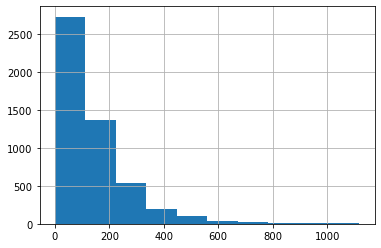

count    5000.000000
mean      135.280000
std       131.842083
min         0.000000
25%        42.000000
50%        99.000000
75%       184.000000
max      1118.000000
dtype: float64

In [48]:
#THỐNG KÊ MÔ TẢ CHO ĐỘ DÀI CÂU

z=[]
z = final_train + final_test
reviews_len = [len(x) for x in z]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [49]:
#EMBEDDING CHO TẬP DỮ LIỆU ĐIỂM ĐÁNH GIÁ

loc = ("C:/Users/DELL/(pyK) Project sentiment analysis/raw_scores.xlsx")
raw_data = xlrd.open_workbook(loc)

#lấy sheet 1 của database
train_scores = raw_data.sheet_by_index(0)
#lấy sheet 2 của database
test_scores = raw_data.sheet_by_index(1)
#Đưa dữ liệu sheet 1 vào trong một list
train_scores_list = []
for i in range(train_scores.nrows):
    train_scores_list.append(train_scores.cell_value(i, 0))
#Đưa dữ liệu sheet 2 vào trong một list
test_scores_list = []
for i in range(test_scores.nrows):
    test_scores_list.append(test_scores.cell_value(i, 0))

pad_score_trainn = []
for sc in train_scores_list:
    if 0 <= sc <= 7:
        pad_score_trainn.append(0)
    if 7 < sc <= 10:
        pad_score_trainn.append(1)      
pad_score_train = np.array(pad_score_trainn)
print(pad_score_train)
print(type(pad_score_train))
print(len(pad_score_train))

pad_score_testt = []
for sc in test_scores_list:
    if 0 <= sc <= 7:
        pad_score_testt.append(0)
    if 7 < sc <= 10:
        pad_score_testt.append(1)      
pad_score_test = np.array(pad_score_testt)
print(pad_score_test)
print(type(pad_score_test))
print(len(pad_score_test))

[1 1 1 ... 0 0 1]
<class 'numpy.ndarray'>
3000
[0 1 1 ... 1 1 1]
<class 'numpy.ndarray'>
2000


In [54]:
#THỰC HIỆN PADDING CHO TẬP DỮ LIỆU

max_words = 200 #Thiết lập độ dài câu tiêu chuẩn

pad_reviews_in_number_train = sequence.pad_sequences(reviews_in_number_train, maxlen=max_words)
pad_reviews_in_number_test = sequence.pad_sequences(reviews_in_number_test, maxlen=max_words)

print(pad_reviews_in_number_train)
print(len(pad_reviews_in_number_train))
print(pad_reviews_in_number_test)
print(len(pad_reviews_in_number_test))

[[   0    0    0 ... 4040 3374 7386]
 [   0    0    0 ... 1320 2620 5708]
 [   0    0    0 ...    0    0 4387]
 ...
 [   0    0    0 ... 2720 3100 6235]
 [   0    0    0 ... 5870 5745  248]
 [   0    0    0 ... 7234 7277 3883]]
3000
[[   0    0    0 ... 1511  876 5263]
 [   0    0    0 ...    0    0 5870]
 [   0    0    0 ... 3374 2153 5728]
 ...
 [   0    0    0 ... 5044 1936 2538]
 [   0    0    0 ... 5512 6748 2268]
 [   0    0    0 ... 4095 5512  663]]
2000


In [55]:
#THỰC HIỆN WORD EMBEDDING CHO TẬP DỮ LIỆU DÙNG WORD2VEC

doc_train = []
for sentence in pad_reviews_in_number_train:
    sent_train=[]
    for idx in sentence:
        if idx != 0:
            sent_train.append(w2v_model.wv[rv_words[rv_indices[idx]]])
        if idx == 0:
            sent_train.append(w2v_model.wv['0'])
    doc_train.append(np.array(sent_train))
embedded_sent_train = np.array(doc_train)           

doc_test = []
for sentence in pad_reviews_in_number_test:
    sent_test=[]
    for idx in sentence:
        if idx != 0:
            sent_test.append(w2v_model.wv[rv_words[rv_indices[idx]]])
        if idx == 0:
            sent_test.append(w2v_model.wv['0'])
    doc_test.append(np.array(sent_test))
embedded_sent_test = np.array(doc_test) 

print(embedded_sent_train.shape)
print(type(embedded_sent_train))
print(embedded_sent_train)
print(embedded_sent_test.shape)
print(type(embedded_sent_test))
print(embedded_sent_test)

(3000, 200, 100)
<class 'numpy.ndarray'>
[[[-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
    0.3342185 ]
  [-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
    0.3342185 ]
  [-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
    0.3342185 ]
  ...
  [ 0.2192305  -0.24183902  0.65120673 ...  0.00125947  0.24219313
   -0.03241878]
  [ 0.11184578 -0.31752375  0.6924265  ...  0.07230993 -0.05431003
    0.29383877]
  [ 0.01689437 -0.46022263  0.5508291  ... -0.3089754   0.0776227
    0.06537396]]

 [[-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
    0.3342185 ]
  [-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
    0.3342185 ]
  [-0.14978288  0.29607552  0.03949325 ... -0.02134722 -0.26166216
    0.3342185 ]
  ...
  [-0.07543869  0.12896152  0.32892856 ... -0.01241871 -0.23308587
    0.33489874]
  [-0.16548407 -0.10918044  0.5218642  ...  0.36912444 -0.08895593
    0.46678704]
  [ 0.08172122  0.11786199  0.306

In [60]:
#XÂY DỰNG MẠNG RNN VỚI 1 LỚP LSTM VÀ 1 LỚP OUTPUT

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [57]:
#CHIA TẬP DỮ LIỆU THÀNH 3 PHẦN: TRAIN, VALIDATION, AND TEST

train_x = pad_reviews_in_number_train
train_y = pad_score_train

valid_x = pad_reviews_in_number_test[0:int(len(pad_reviews_in_number_test)*0.5)]
valid_y = pad_score_test[0:int(len(pad_score_test)*0.5)]

test_x = pad_reviews_in_number_test[int(len(pad_reviews_in_number_test)*0.5):]
test_y = pad_score_test[int(len(pad_score_test)*0.5):]

In [59]:
#TẠO CÁC DATALOADERS

#Tạo tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

batch_size = 50 #Số lượng dữ liệu mỗi lần đưa vào mô hình
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
#Chắc chắn dữ liệu mỗi lần đưa vào mô hình là ngẫu nhiên và không trùng lặp với nhau

#Ex: Kiểm tra thử một batch dữ liệu
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size())
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size())
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[   0,    0,    0,  ...,  501, 6469, 2466],
        [   0,    0,    0,  ..., 7301, 4356, 6726],
        [   0,    0,    0,  ..., 4857, 1183, 1288],
        ...,
        [   0,    0,    0,  ..., 1809, 4487, 2799],
        [   0,    0,    0,  ..., 1724, 7258, 5338],
        [   0,    0,    0,  ..., 5402, 5742, 5662]], dtype=torch.int32)
Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1], dtype=torch.int32)


In [61]:
#XÂY DỰNG CẤU TRÚC MẠNG LSTM

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        #Khởi tạo các lớp cho mô hình
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        #Lớp embedding và lớp LSTM
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)

        #Lớp dropout
        self.dropout = nn.Dropout(0.3)
        
        #Lớp linear và lớp sigmoid
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)

        #Embeddings và lstm out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        #Stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        #Lớp dropout và lớp fully connected
        out = self.dropout(lstm_out)
        out = self.fc(out)
        #Hàm sigmoid
        sig_out = self.sig(out)
        
        #Reshape về batch size ban đầu
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] #Lấy batch cuối cùng của tập dữ liệu nhãn đánh giá
        
        #Trả về sigmoid output cuối cùng và trạng thái ẩn (hidden state)
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        #Tạo hidden state
        #Tạo hai tensors mới với các kích thước (n layers) x (batch size) x (hidden dim)
        #Khởi tạo ban đầu về 0 cho hidden state và cell state của mạng LSTM
        weight = next(self.parameters()).data
        
        #Nếu có thể dùng GPU
        #if (train_on_gpu):
        #    hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
        #          weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        #else:
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        return hidden

In [63]:
#KHỞI TẠO MÔ HÌNH VÀ CÁC THAM SỐ

vocab_size = len(words_with_indices)+1 #+1 vì 0 padding
output_size = 1
embedding_dim = 200
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(7401, 200)
  (lstm): LSTM(200, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [64]:
#THỰC HIỆN HUẤN LUYỆN MÔ HÌNH

lr=0.001 #Giá trị learning rate

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

epochs = 6 #Chọn giá trị này vừa đủ để hàm loss không thể giảm thêm nữa
counter = 0
print_every = 50
clip=5 #Gradient clipping

#Nếu có thể dùng GPU
#if(train_on_gpu):
#    net.cuda()

net.train()
for e in range(epochs):
    #Khởi tạo hidden state
    h = net.init_hidden(batch_size)

    #Vòng lặp cho batch
    for inputs, labels in train_loader:
        counter += 1
        
        #Nếu có thể dùng GPU
        #if(train_on_gpu):
        #    inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])
        #Zero accumulated gradients
        net.zero_grad()

        #Đưa dữ liệu output từ mô hình
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        #Tính toán hàm loss và thực hiện backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        #Lệnh "clip_grad_norm" giúp ngăn chặn exploding gradient trong các mô hình RNN nói chung và LSTM nói riêng
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        #Thống kê mô tả hàm loss
        if counter % print_every == 0:
            #Cho tập validation
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])

               #Nếu có thể dùng GPU
               #if(train_on_gpu):
               #    inputs, labels = inputs.cuda(), labels.cuda()
                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())
                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/6... Step: 50... Loss: 0.414630... Val Loss: 0.573641
Epoch: 2/6... Step: 100... Loss: 0.502790... Val Loss: 0.480375
Epoch: 3/6... Step: 150... Loss: 0.233261... Val Loss: 0.497315
Epoch: 4/6... Step: 200... Loss: 0.197142... Val Loss: 0.606522
Epoch: 5/6... Step: 250... Loss: 0.066670... Val Loss: 0.599231
Epoch: 5/6... Step: 300... Loss: 0.303870... Val Loss: 0.611159
Epoch: 6/6... Step: 350... Loss: 0.121926... Val Loss: 0.631947


In [65]:
#HÀM LOSS VÀ ĐỘ CHÍNH XÁC CỦA TẬP DỮ LIỆU TEST

test_losses = []
num_correct = 0

#Khởi tạo hidden state
h = net.init_hidden(batch_size)

net.eval()
for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
   #Nếu có thể dùng GPU
   #if(train_on_gpu):
   #    inputs, labels = inputs.cuda(), labels.cuda()
    
    #Lấy những dữ liệu output được mô hình dự đoán
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    #Tính toán hàm loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    #Chuyển các xác suất đầu ra thành các giá trị dự đoán (ở đây là 0 hoặc 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    #Kiểm tra các giá trị dự đoán và nhãn cảm xúc thực
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

#Giá trị trung bình của hàm loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))
#Độ chính xác trên cả tập dữ liệu test
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.431
Test accuracy: 0.883


In [ ]:
#The end!(620)